In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import databuilder
import matplotlib.dates as mdates

# Load all data
db = databuilder.DataBuilder()


Loading ./Resources/COS2019.csv
Successfully loaded data for ./Resources/COS2019.csv
Loading ./Resources/COS2020.csv
Successfully loaded data for ./Resources/COS2020.csv
Loading ./Resources/COS2021.csv
Successfully loaded data for ./Resources/COS2021.csv
Loading ./Resources/COS2022.csv
Successfully loaded data for ./Resources/COS2022.csv
Loading ./Resources/COS2023.csv
Successfully loaded data for ./Resources/COS2023.csv

Successfully combined 5 files
Total records: 1,150,331
Loading ./Resources/full_moons.csv
Successfully loaded data for ./Resources/full_moons.csv

Successfully combined 1 files
Total records: 1,868
Loading ./Resources/merc_retro.csv
Successfully loaded data for ./Resources/merc_retro.csv

Successfully combined 1 files
Total records: 16
Loading ./Resources/Newmoondata.csv
Successfully loaded data for ./Resources/Newmoondata.csv

Successfully combined 1 files
Total records: 61


In [3]:
# Load the ergency dataset and display the first few rows
emergency_df = db.get_emergency_data()
display(emergency_df.head())

# Load the full moon data and display the first few rows
full_moon_df = db.get_full_moon_data()
display(full_moon_df.head())

,INCIDENT,REPORTED,CLOSED,CATEGORY
0,19000004,2019-01-01 00:03:00,2019-01-01 01:22:00,ALS
1,19000006,2019-01-01 00:05:00,2019-01-01 00:29:00,ALS
2,19000008,2019-01-01 00:07:00,2019-01-01 00:20:00,ALS
3,19000011,2019-01-01 00:10:00,2019-01-01 00:23:00,BLS
4,19000013,2019-01-01 00:10:00,2019-01-01 00:36:00,ALS


,Day,Flag,DateTime
0,Monday,Full,2000-01-15 20:07:30
1,Wednesday,Full,2000-02-14 14:50:12
2,Friday,Full,2000-03-16 09:11:48
3,Sunday,Full,2000-04-15 02:02:06
4,Monday,Full,2000-05-14 16:36:36


In [4]:
# Assuming your dataframe is named emergency_df
emergency_df['Reported_Date'] = emergency_df['REPORTED'].dt.date
emergency_df_grouped = emergency_df.groupby('Reported_Date').size().reset_index(name='Count') #Group by date and display count of rows

# Convert REPORTED_DATE back to datetime for easier plotting
emergency_df_grouped['Reported_Date'] = pd.to_datetime(emergency_df_grouped['Reported_Date'])

print(len(emergency_df_grouped))
display(emergency_df_grouped.head())

1826


,Reported_Date,Count
0,2019-01-01,555
1,2019-01-02,621
2,2019-01-03,566
3,2019-01-04,613
4,2019-01-05,538


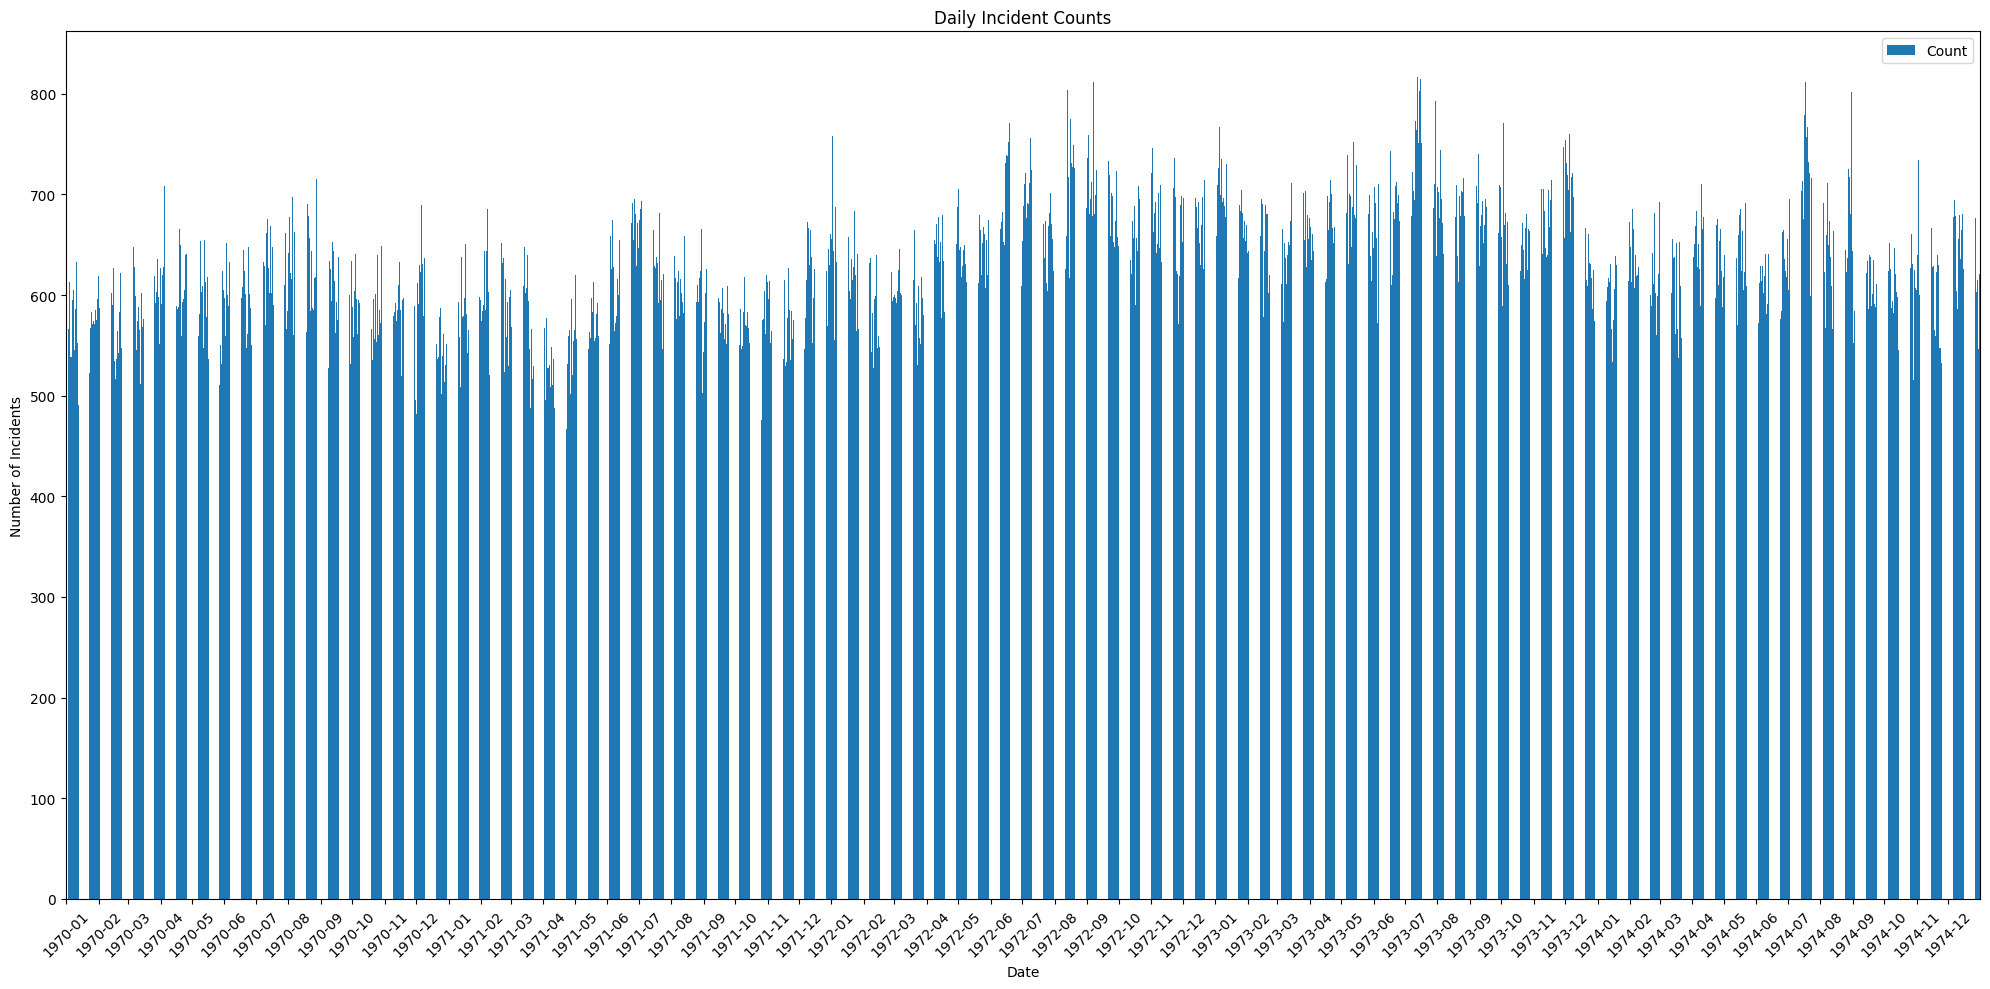

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the incident counts
#ax.plot(emergency_df_grouped['Reported_Date'], emergency_df_grouped['Count'])
emergency_df_grouped.plot(kind='bar', x='Reported_Date', y='Count', ax=ax)

# Customize the plot
plt.title('Daily Incident Counts')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

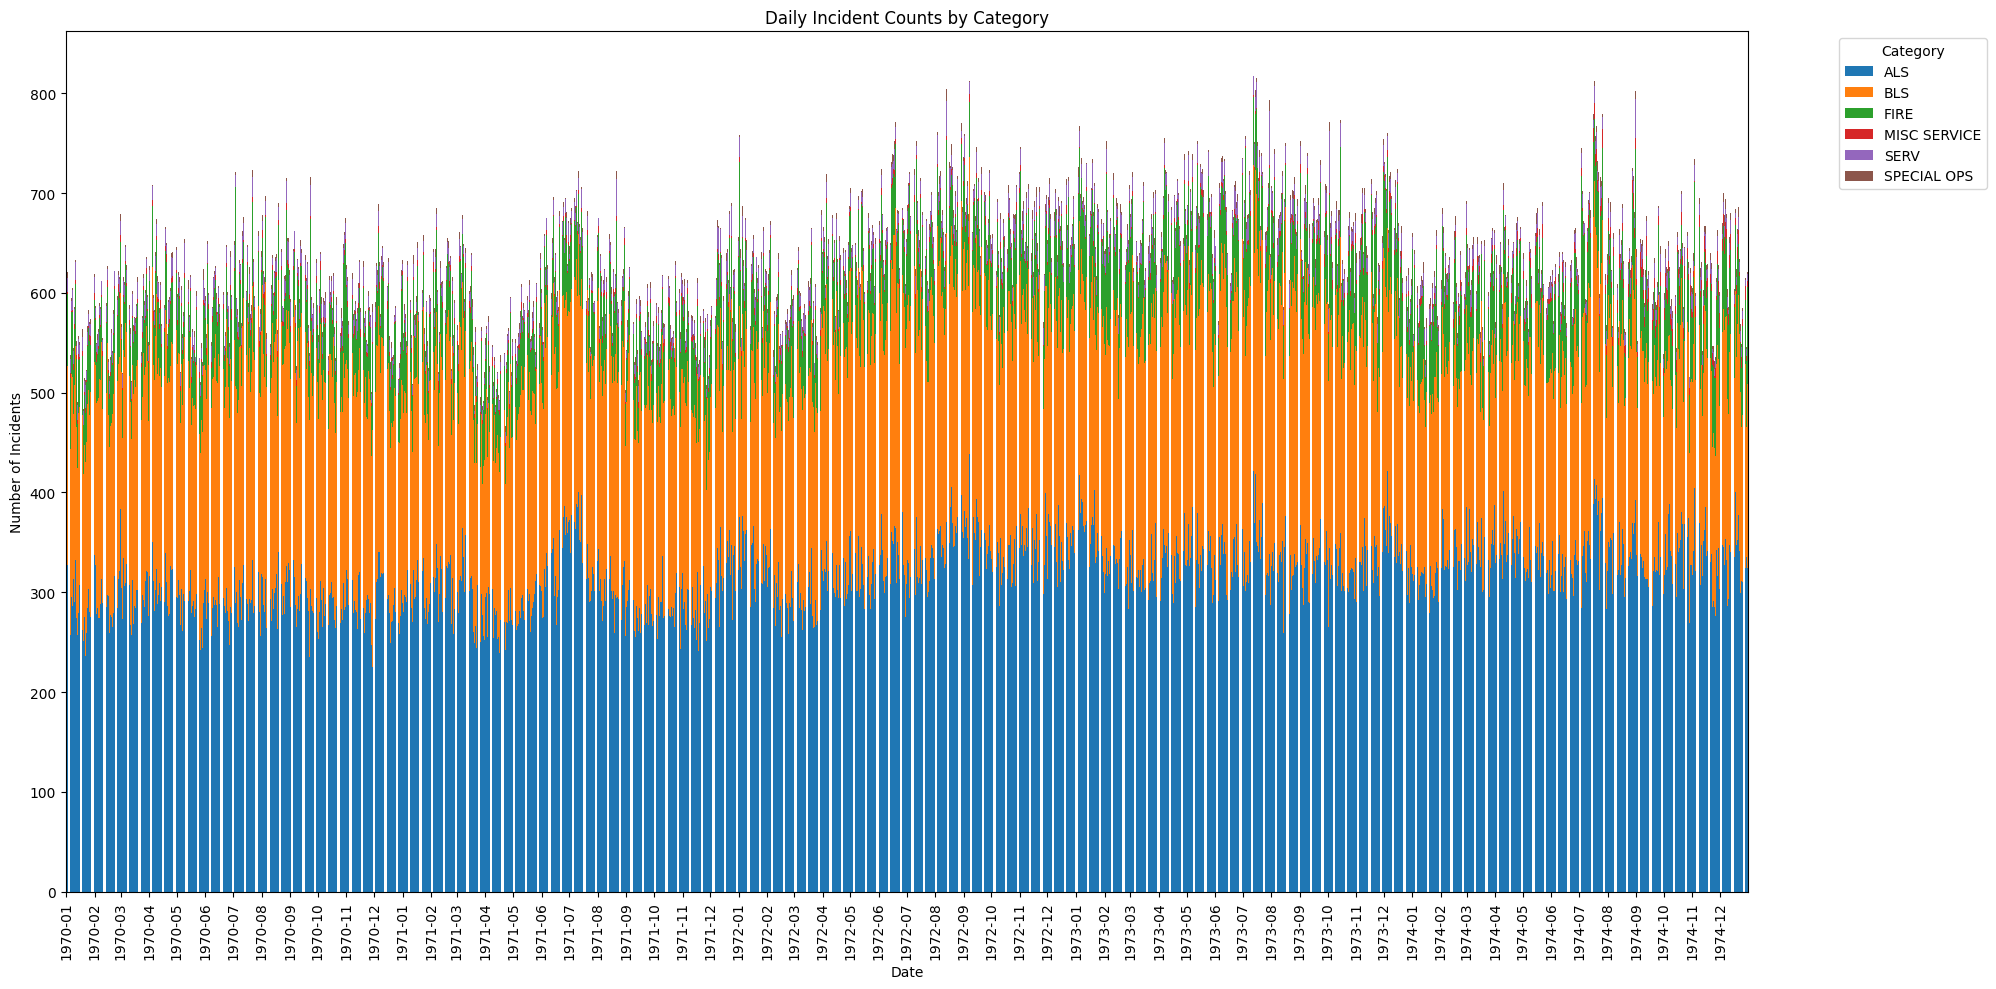

In [6]:
category_counts = emergency_df.groupby(['Reported_Date', 'CATEGORY']).size().unstack(fill_value=0)

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(20, 10))
category_counts.plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Reduce x-axis labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Plot stacked bar chart
plt.title('Daily Incident Counts by Category')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
print(len(full_moon_df))
print(full_moon_df.columns)
print(full_moon_df.dtypes)
display(full_moon_df)

1868
Index(['Day', 'Flag', 'DateTime'], dtype='object')
Day                 object
Flag                object
DateTime    datetime64[ns]
dtype: object


,Day,Flag,DateTime
0,Monday,Full,2000-01-15 20:07:30
1,Wednesday,Full,2000-02-14 14:50:12
2,Friday,Full,2000-03-16 09:11:48
3,Sunday,Full,2000-04-15 02:02:06
4,Monday,Full,2000-05-14 16:36:36
...,...,...,...
1863,Thursday,Full,2050-09-01 11:30:54
1864,Friday,Blue,2050-09-30 19:31:48
1865,Sunday,Total Eclipse,2050-10-30 04:16:00
1866,Monday,Full,2050-11-28 16:09:48


In [8]:
# Only keep Flag values that are Full
full_moon_simplified_df = full_moon_df[full_moon_df['Flag'] == 'Full']

display(full_moon_simplified_df)

,Day,Flag,DateTime
0,Monday,Full,2000-01-15 20:07:30
1,Wednesday,Full,2000-02-14 14:50:12
2,Friday,Full,2000-03-16 09:11:48
3,Sunday,Full,2000-04-15 02:02:06
4,Monday,Full,2000-05-14 16:36:36
...,...,...,...
1861,Monday,Full,2050-07-04 20:51:00
1862,Wednesday,Full,2050-08-03 04:20:30
1863,Thursday,Full,2050-09-01 11:30:54
1866,Monday,Full,2050-11-28 16:09:48


In [9]:
full_moon_simplified_date_df = full_moon_simplified_df.copy()
full_moon_simplified_date_df['Date'] = full_moon_simplified_df['DateTime'].dt.date
full_moon_simplified_date_df = full_moon_simplified_date_df.drop(columns=['DateTime'])

# Convert Date back to datetime for easier plotting
full_moon_simplified_date_df['Date'] = pd.to_datetime(full_moon_simplified_date_df['Date'])

display(full_moon_simplified_date_df)

,Day,Flag,Date
0,Monday,Full,2000-01-15
1,Wednesday,Full,2000-02-14
2,Friday,Full,2000-03-16
3,Sunday,Full,2000-04-15
4,Monday,Full,2000-05-14
...,...,...,...
1861,Monday,Full,2050-07-04
1862,Wednesday,Full,2050-08-03
1863,Thursday,Full,2050-09-01
1866,Monday,Full,2050-11-28


In [10]:
# Display Count for Reported_Date that appears in both emergency_df_grouped and full_moon_simplified_df
# Step 1: Find the common Reported_Date values
common_dates = emergency_df_grouped[emergency_df_grouped['Reported_Date'].isin(full_moon_simplified_date_df['Date'])]

# Display the count of common Reported_Date values
display(common_dates)

,Reported_Date,Count
15,2019-01-16,612
45,2019-02-15,627
49,2019-02-19,564
74,2019-03-16,576
79,2019-03-21,589
...,...,...
1757,2023-10-24,592
1787,2023-11-23,547
1791,2023-11-27,615
1817,2023-12-23,569


In [19]:
#remove full moon days from emergency_df_grouped
emergency_df_grouped_no_full_moon = emergency_df_grouped[~emergency_df_grouped['Reported_Date'].isin(common_dates['Reported_Date'])]
print(f"Total records: {len(emergency_df_grouped)}")
print(f"Total records: {len(emergency_df_grouped_no_full_moon)}")
print(f"Total records: {len(common_dates)}")

Total records: 1826
Total records: 1728
Total records: 98


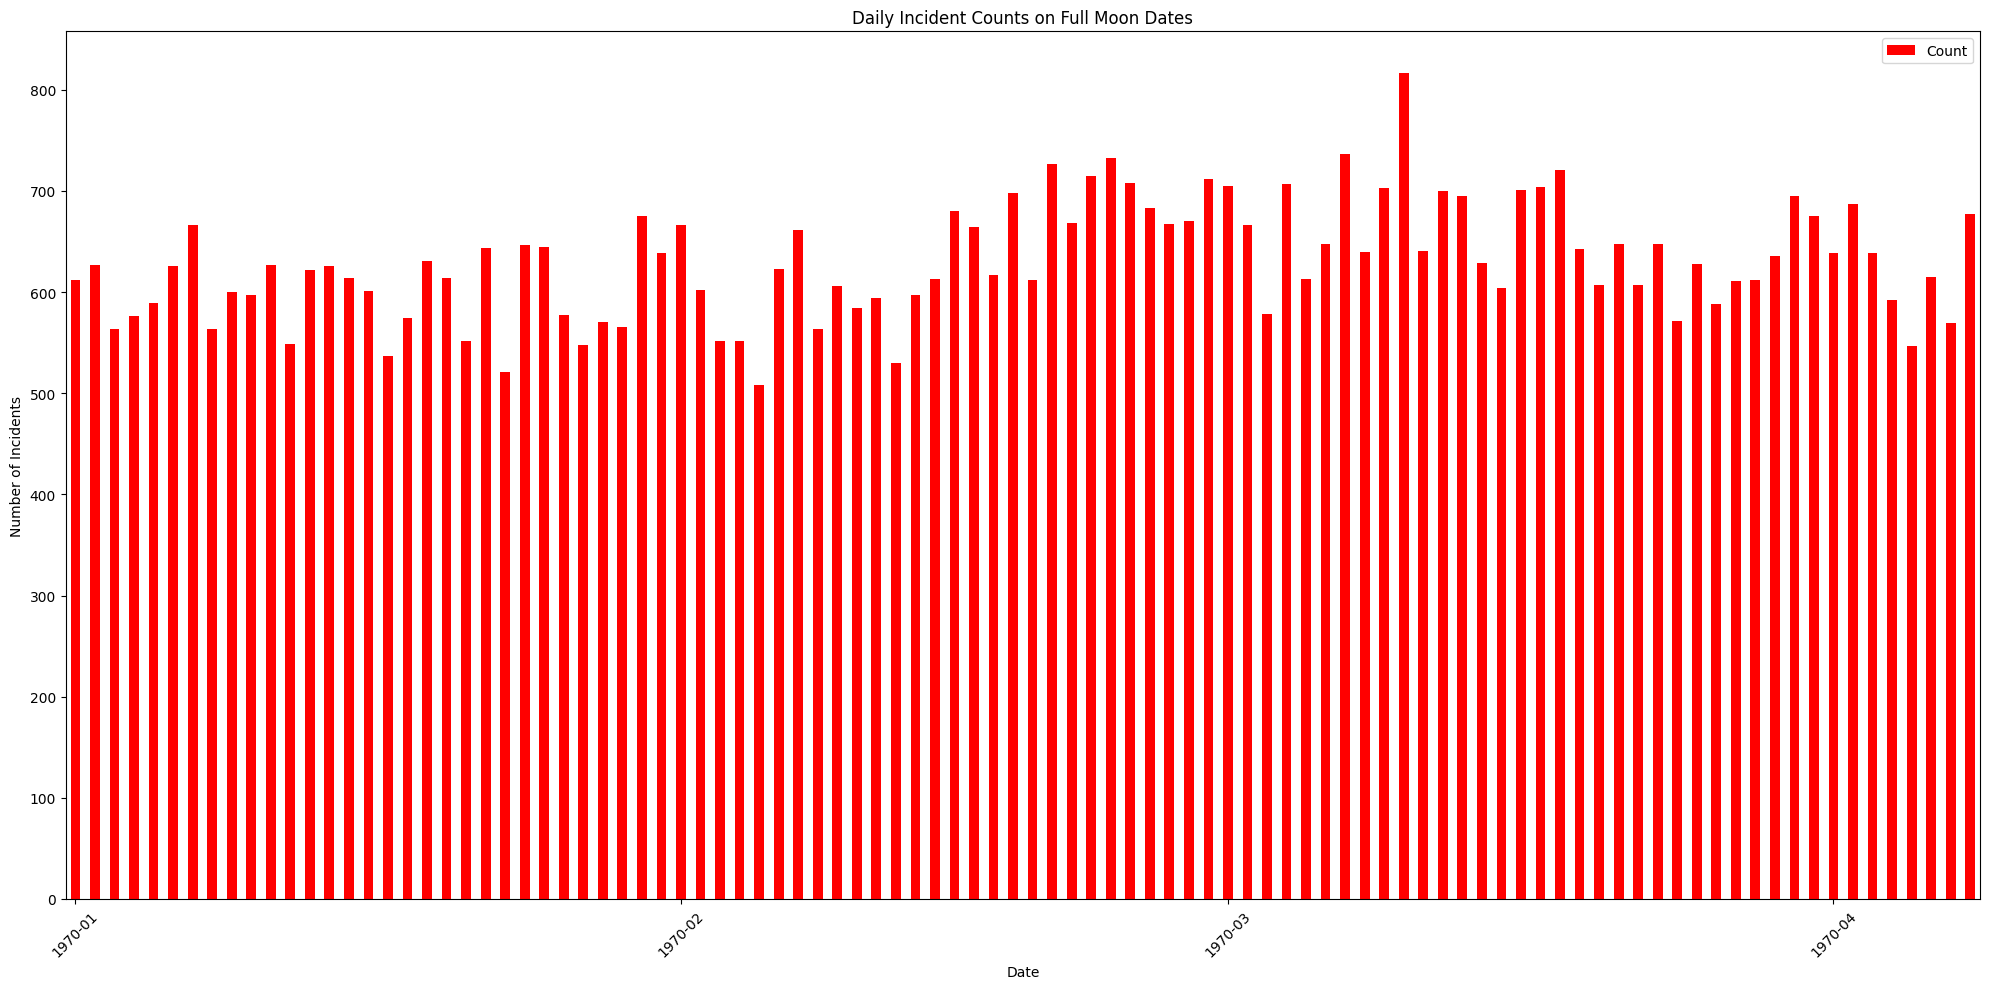

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the incident counts
#ax.plot(common_dates['Reported_Date'], common_dates['Count'])
common_dates.plot(kind='bar', color='red', x='Reported_Date', y='Count', ax=ax)

# Customize the plot
plt.title('Daily Incident Counts on Full Moon Dates')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

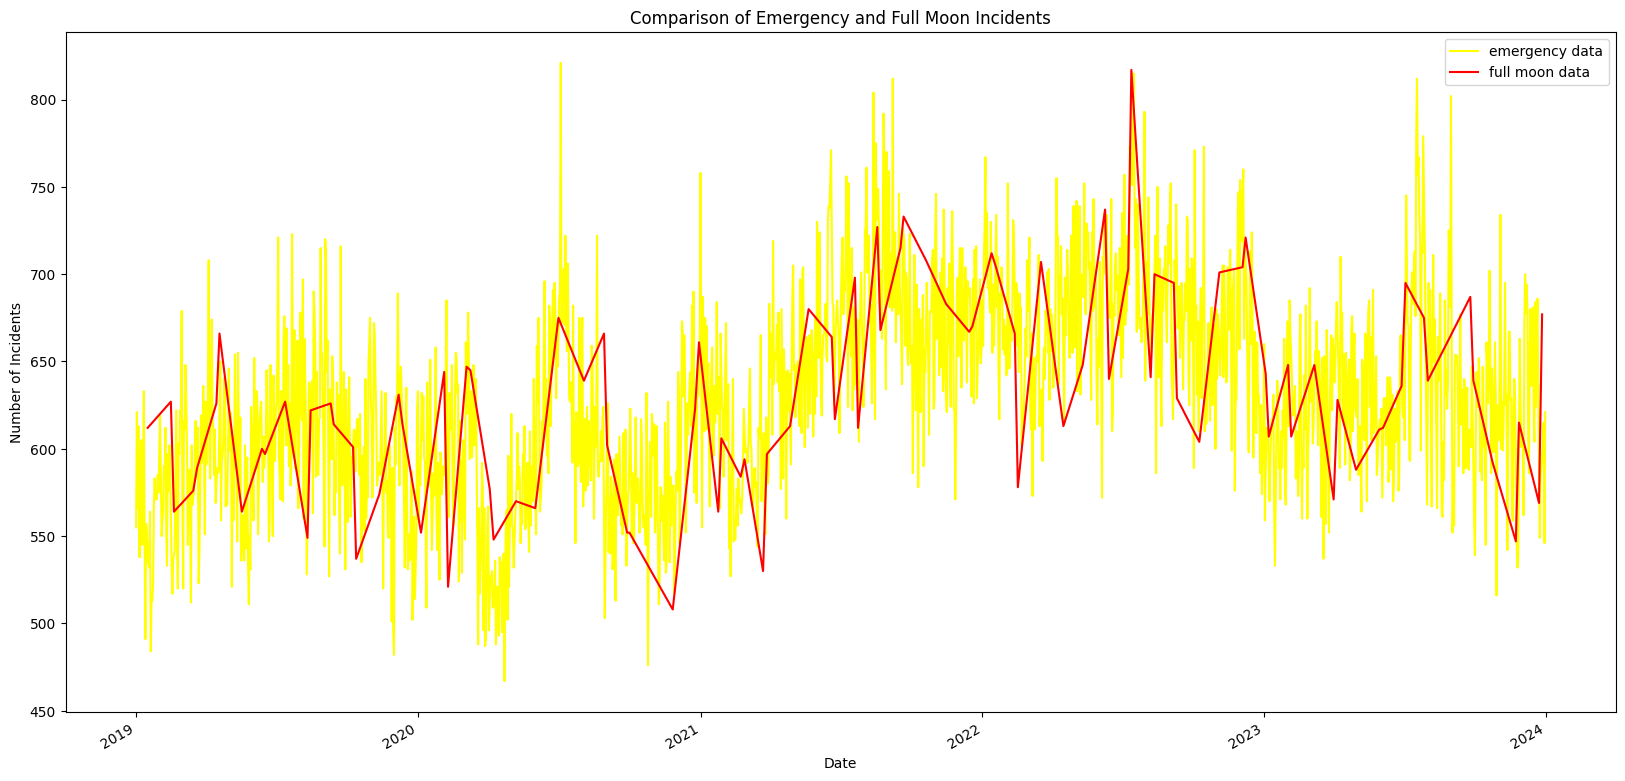

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

emergency_df_grouped_no_full_moon.plot(color='yellow', x='Reported_Date', y='Count', ax=ax)
common_dates.plot(color='red', x='Reported_Date', y='Count', ax=ax)

plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Comparison of Emergency and Full Moon Incidents')
plt.legend(['emergency data', 'full moon data'])
plt.show()

In [20]:
#Display the average number of incidents on full moon days and non-full moon days
#in the year 2020. The data is available in the file full_moon.csv.

full_moon_avg = common_dates['Count'].mean()
emergency_df_grouped_avg = emergency_df_grouped['Count'].mean()
emergency_df_grouped_no_full_moon_avg = emergency_df_grouped_no_full_moon['Count'].mean()

print(f'Average number of incidents on full moon days: {full_moon_avg:.2f}')
print(f'Average number of incidents: {emergency_df_grouped_avg:.2f}')
print(f'Average number of incidents on non-full moon days: {emergency_df_grouped_no_full_moon_avg:.2f}')

Average number of incidents on full moon days: 630.09
Average number of incidents: 629.97
Average number of incidents on non-full moon days: 629.97


In [15]:
percent_diff = ((full_moon_avg - emergency_df_grouped_no_full_moon_avg) / emergency_df_grouped_no_full_moon_avg) * 100

print(f"\nPercent difference: {percent_diff:.2f}%")


Percent difference: 0.02%


In [ ]:
#correlation between the number of incidents on full moon days and non-full moon days
